# Decision Tree
<br>

1. **Structure** -
   1. Root node- Top most decision node
   2. Leaves - Carries decision or classification
   3. Height/Depth - Number of Nodes in longest path 
<br>

2. **Entropy** - Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information

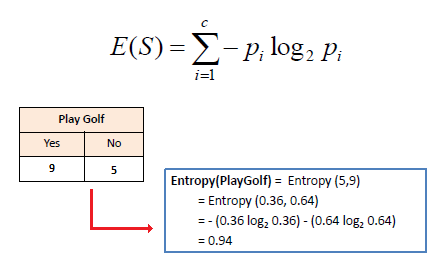


  P is the probability of instance in total group
  e.g. in jungle if their are 4 jiraf among 100 total animals P is 4/100 such P is calculated for each animal and summation as shown is made to give entropy.
<br>

3. **Information gain** - It is the measure of decrease in   entropy after the dataset is split i.e. entropy is lowered.
`Gain = Entropy1 - Entropy2`
<br>

**Splits are made such that split gives the highest gains.**





4. **Gini index** - Gini index is a cost function used to evaluate splits in the dataset. 

 - It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.
  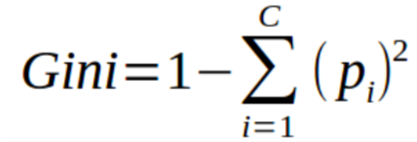

 - Binary splits only, Gini Index works with the categorical target variable “Success” or “Failure”.

 - Higher value of Gini index implies higher inequality, higher heterogeneity.
 
 - Mainely used in Ensemble techniques because it is efficient in terms of computational time taken due to lack of **log** terms in formulae.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# 1. Importing the Data

In [4]:
train_dt = pd.read_csv("C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_train.csv")
test_dt = pd.read_csv("C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic_test.csv")

In [5]:
train_dt.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
train_dt.shape

(891, 12)

In [7]:
train_dt.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
train_dt.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
train_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. Preprocessing the data

## 2.1. Dropping unnecessary data

**PassengerId**, **Ticket**,**Cabin**, **Name** Column don't affects the Survival of Passenger hence they are dropped.

In [10]:
train_dt = train_dt.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 2.2 Filling the Null
 - We have Null values at **Age** and **Embarked** columns
 - Fillig Nan values with mean() values and mode() values

In [11]:
train_dt["Age"].fillna(train_dt["Age"].mean(), inplace=True)
train_dt["Embarked"].fillna(train_dt["Embarked"].mode()[0], inplace=True)
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 2.3. Exploratory Data Analysis

Using Pandas **Plot** function for plotting

In [12]:
# To avoid writting similar code frequently create function for plotting

def bar_chart(column):
    survived = train_dt[train_dt["Survived"]==1][column].value_counts()
    dead = train_dt[train_dt["Survived"]==0][column].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index=["Survived", "Dead"]
    df.plot(kind="bar", figsize=(10,5))

## 2.3.1 Bar chart for "Sex" column

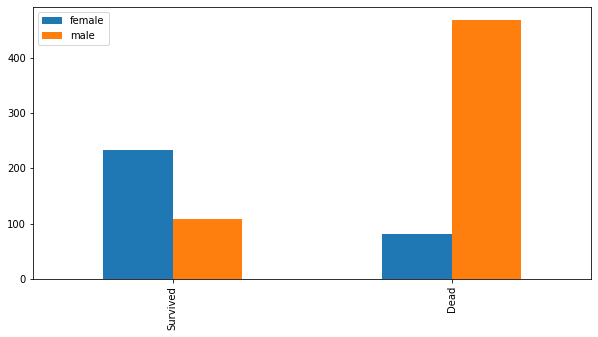

In [13]:
bar_chart("Sex")

### Conclusion - Females has more chances to survive than males

## 2.3.2 Bar chart for "P-clas" column

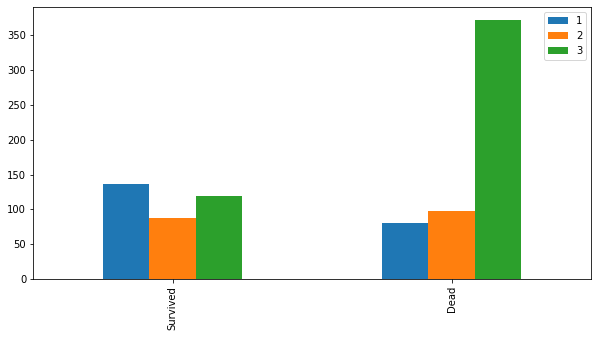

In [14]:
bar_chart("Pclass")

### 1st Class have higher chances of survivals

## 2.3.3 Bar chart for "Siblings" column 

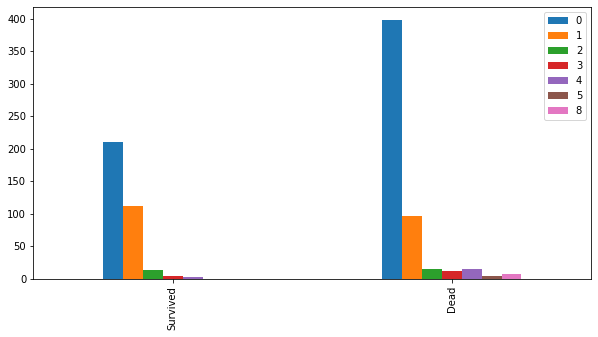

In [15]:
bar_chart("SibSp")

### Their is almost no chance of survival who has more siblings

## 2.3.4 Bar chart for "Parch" Column

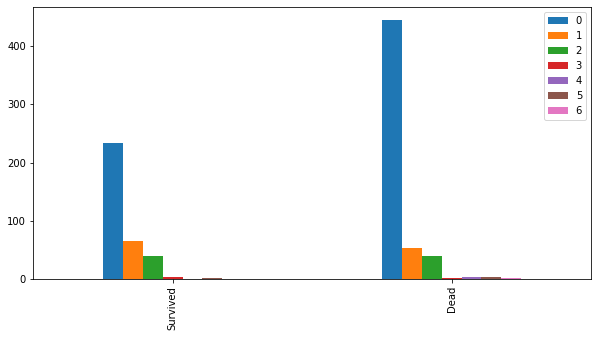

In [16]:
bar_chart("Parch")

## 2.3.5 Bar chart for "Embarked" Column

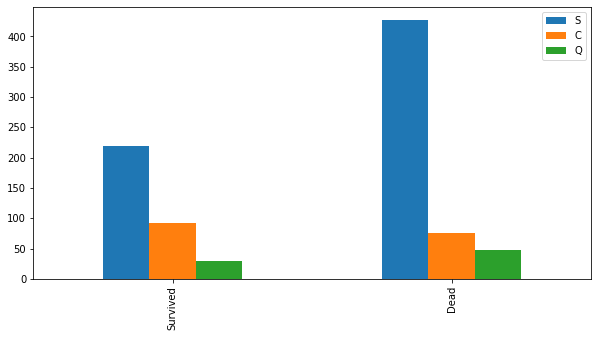

In [17]:
bar_chart("Embarked")

### Passengers from "Cherbourg" Survived more than any other ports

## 2.3.6 Removing the outliers

Outliers are detected from Box plots


In [18]:
# Function for Boxplot to see outliers
def box_plot(column):
    train_dt.boxplot(by="Survived", column=[column], grid=True)

## 2.3.6.1 Outliers in "Fare"

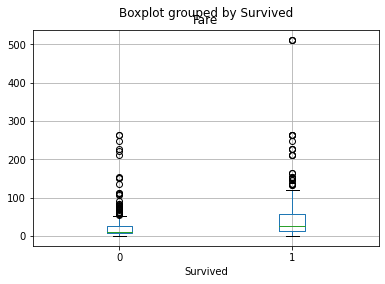

In [19]:
box_plot("Fare")

## Here points above 100 can be considered as outliers

## 2.3.6.2 Outliers in "Siblings"

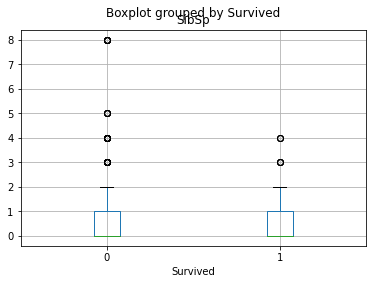

In [20]:
box_plot("SibSp")

### Here points above 4 siblings considered as outliers

In [21]:
train_dt["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Here Top 12 from 5 and 8 "Siblings" should br droped as they are outliers

In [22]:
dt_index = train_dt.nlargest(12, ["SibSp"])
dt_index

Survived  Pclass     Sex        Age  SibSp  Parch   Fare Embarked
159         0       3    male  29.699118      8      2  69.55        S
180         0       3  female  29.699118      8      2  69.55        S
201         0       3    male  29.699118      8      2  69.55        S
324         0       3    male  29.699118      8      2  69.55        S
792         0       3  female  29.699118      8      2  69.55        S
846         0       3    male  29.699118      8      2  69.55        S
863         0       3  female  29.699118      8      2  69.55        S
59          0       3    male  11.000000      5      2  46.90        S
71          0       3  female  16.000000      5      2  46.90        S
386         0       3    male   1.000000      5      2  46.90        S
480         0       3    male   9.000000      5      2  46.90        S
683         0       3    male  14.000000      5      2  46.90        S

In [23]:
# Dropping the above rows to remove outliers
train_dt.drop(dt_index.index, inplace=True)

In [24]:
train_dt.shape

(879, 8)

## 2.3.6.3 Outliers in "Parch"

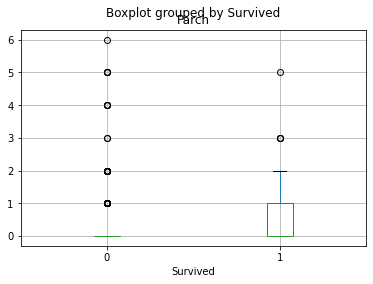

In [25]:
box_plot("Parch")

In [26]:
train_dt["Parch"].value_counts()

0    678
1    118
2     68
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
dt_index = train_dt.nlargest(15, ["Parch"])
train_dt.drop(dt_index.index)

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[864 rows x 8 columns]

## 2.3.7. Correlation of Columns
We use heatmap to see correlation of different columns

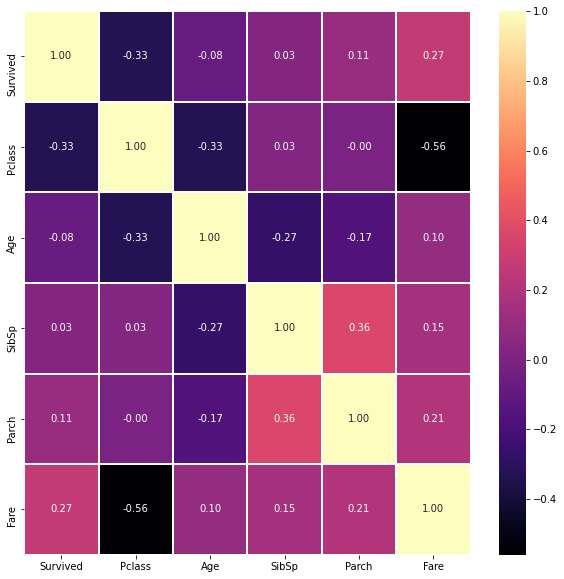

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(train_dt.corr(), annot=True, linewidths=0.05, fmt='.2f', cmap="magma")
plt.show()

## **EDA Results**
 - **Cabin** have lots of null value hence droped
 - **Ticket, PassengerId** - not usefull and don;t effect on survival rate hence dropped.
 - People having higher class survives the most
 - Females survived more than males
 - 1st class females have more chane to survive
 - People with siblings and parents survive more
 - People from Cherbourg survive the more

## 2.4 Encoding categorical data
As **Sex**,**Embarked** has categorical data which dont have any order to follow hence we use OneHotEncoding

In [29]:
train_dt = pd.get_dummies(train_dt)
train_dt

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.000000      1      0   7.2500           0         1   
1           1       1  38.000000      1      0  71.2833           1         0   
2           1       3  26.000000      0      0   7.9250           1         0   
3           1       1  35.000000      1      0  53.1000           1         0   
4           0       3  35.000000      0      0   8.0500           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000           0         1   
887         1       1  19.000000      0      0  30.0000           1         0   
888         0       3  29.699118      1      2  23.4500           1         0   
889         1       1  26.000000      0      0  30.0000           0         1   
890         0       3  32.000000      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0           0           1  
3             0           0           1  
4             0           0           1  
..          ...         ...         ...  
886           0           0           1  
887           0           0           1  
888           0           0           1  
889           1           0           0  
890           0           1           0  

[879 rows x 11 columns]

# 3 Defining the Model 

**DecisionTreeClassifier(**
    *,
   - **criterion** ={'gini','entropy'}
   - **splitter** ={'best','random'}
   - **max_depth** ={None,int}
   - **min_samples_split** ={2,int}
   - **min_samples_leaf** ={1,int}
   - **min_weight_fraction_leaf** =0.0,
   - **max_features** =None,
   - **random_state** =None,
   - **max_leaf_nodes** =None,
   - **min_impurity_decrease** =0.0,
   - **min_impurity_split** =None,
   - **class_weight** =None,
   - **ccp_alpha** =0.0,
**)**


**Parameters**
---------------------
 1. `criterion` -
  - Both are similar but entropy may be slower because of Logarithms hence Gini is used for Ensemble techniques.
 
 2. `splitter` - 
  - **best** - for large number of features best split nodes are found and then used for splitting
  - **random** - for large number of features it may use features which are not really usefull or significant, but it is less prone to overfitting than "best" splitter.
 
 3. `max_depth` -
  - incase of default null, nodes are exapnded until all leaves are pure or until all leaves contain less than "min_samples_split_samples".
  - The theoretical maximum depth a decision tree can achieve is one less than the number of training samples, but no algorithm will let you reach this point for obvious reasons, one big reason being overfitting
  - We choose depth by experiments only their is no ideal value.
 
 4. `min_samples_split` -[default = 2] [Ideally 1 to 40]
  - used for controlling the overfitting and underfitting large value causes overfitting.
  - min_samples_split and min_samples_leaf,are quite similar to each other.Leaf is an external node and the min_samples_split talks about an internal node and by definition an internal node can have further split whereas a leaf node by definition is a node without any children.
  - Say you specify a min_samples_split and the resulting split results in a leaf with 1 sample and you have specified min_samples_leaf as 2, then your min_samples_split will not be allowed. In other words, min_samples_leaf is always guaranteed no matter the min_samples_split value.
  
 5. `min_samples_leaf` = [default = 1][Ideally 1 to 20]
 - Used to control overfitting and underfitting,very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data and this should make sense.
 
 6. `min_weight_fraction_leaf` = []
 7. `max_features`=[int, float, "auto","sqrt", "log2", "None"]
   - **int** - then consider max_features features at each split.
   - **float** - then max_features is a fraction and int(max_features * n_features) features are considered at each split.
   - **auto** - then max_features=sqrt(n_features).
   - **sqrt** -then max_features=sqrt(n_features).
   - **log2** -then max_features=log2(n_features).
   - **None** -then max_features=n_features.
   - Every time there is a split, your algorithm looks at a number of features and takes the one with the optimal metric using gini impurity or entropy, and creates two branches according to that feature. It is computationally heavy to look at all the features every single time, so you can just check some of them using the various max_features options. Another use of max_features is to limit overfitting, by choosing a reduced number of features we can increase the stability of the tree and reduce variance and over-fitting.
 8. `random_state` = [int]
   - Used to regenerate same permutations of same data with given reference number.
 9. `max_leaf_nodes` = [None,int]
 10. `min_impurity_decrease` = [float]
   - min_impurity_decrease helps us control how deep our tree grows based on the impurity, As its value increases minimum impurity decrease should higher for further splitting hence depth is restricted further.
 11. `min_impurity_split`= [None,]
 12. `class_weight1` =[None, Dict of feature and weight as key-values]
   - class_weight is used to provide a weight or bias for each output class. But what does this actually mean, see when the algorithm calculates the entropy or gini impurity to make the split at a node, the resulting child nodes are weighted by the class_weight giving the child samples weights based on the class proportion you specify.
 13. `ccp_alpha`=0.0,


### 3.1 Divide the data to Features and Target

In [30]:
X = train_dt.drop(["Survived"], axis=True)
y = train_dt["Survived"]

### 3.2 Train test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 3.3 Defining the Model

In [32]:
model = DecisionTreeClassifier(random_state=140)

### 3.4 Fitting

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=140)

### 3.5 Predicting

In [34]:
y_pred = model.predict(X_test)

# 4. Evaluating the model

In [35]:
model.score(X_test, y_test)

0.7954545454545454

In [36]:
confusion_matrix(y_test, y_pred)

array([[91, 16],
       [20, 49]], dtype=int64)

# 5. Hyperparameter Tuning

In [37]:
params = {
    "criterion":['gini','entropy'],
   # "splitter" :['best','random'],
    "max_depth":[x for x in range(1,30,5)],
    "min_samples_split":[x for x in range(1,30,5)],
    "min_samples_leaf" : [x for x in range(1,30,5)],
   # "min_weight_fraction_leaf" : [x for x in range(1,30,5)],
    "max_features" : ['log2', 'sqrt','auto'], 
    "random_state" : [42],
   # "max_leaf_nodes" : [x for x in range(1,30,5)],
    "min_impurity_decrease":[0.1,0.3,0.4,0.6,0.7,0.8,1],
}

model_cv = GridSearchCV(model, params, refit=True, verbose=3, cv=3)

In [38]:
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9072 candidates, totalling 27216 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_feat

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=2

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_le

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_

[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=

[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_

[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=

[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_sa

[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=2

[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, 

[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, mi

[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_

[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_sp

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, mi

[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_

[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, m

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=1

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, 

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_lea

[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=2

[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_sampl

[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min

[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_le

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, m

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_lea

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_sam

[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=

[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, 

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_l

[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, 

[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, mi

[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, 

[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=2

[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6,

[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_lea

[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, mi

[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1

[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, 

[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_lea

[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_

[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min

[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_sa

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_l

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=11

[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, 

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_

[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, 

[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_lea

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, m

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_

[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_sp

[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=26, min

[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_sampl

[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples

[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_sa

[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_l

[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_sa

[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_lea

[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samp

[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_sa

[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, 

[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_sa

[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_

[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21

[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_sa

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_sa

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples

[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf

[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples

[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_sampl

[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_sampl

[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_sa

[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_sa

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples

[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_sa

[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_sam

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples

[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_sampl

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_sam

[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_le

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_

[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples

[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_sampl

[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_sa

[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=2

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_lea

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_sampl

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_sa

[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_sa

[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples

[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples

[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_sampl

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_sampl

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_sa

[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samp

[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_

[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_

[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_sam

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_sa

[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_le

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_sa

[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_sa

[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26,

[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_sa

[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, 

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_sa

[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, 

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_sa

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_sa

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_le

[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samp

[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min

[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samp

[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples

[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_lea

[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_sa

[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, 

[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_sa

[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_le

[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_le

[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_sa

[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=

[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_sa

[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_sa

[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples

[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_sa

[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_le

[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_sa

[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_sa

[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=

[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_

[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_sa

[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, 

[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_sa

[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samp

[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_sampl

[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_l

[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_sa

[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, 

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_sam

[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_lea

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_sa

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, 

[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_sa

[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min

[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21

[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_

[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples

[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples

[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_sam

[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samp

[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_sa

[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples

[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_

[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1

[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_sampl

[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples

[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf

[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_sampl

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_sa

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, mi

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_sa

[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=

[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_sa

[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samp

[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=2

[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples

[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_sampl

[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samp

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_sa

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=

[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples

[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_sa

[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_s

[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=2

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_s

[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.

[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4,

[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.4, min_s

[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6,

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=

[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, mi

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples

[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_impurity_decrease=1, min_samples_lea

[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1,

[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.

[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8,

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=0

[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples

[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_impurity_decrease=1, min_sam

[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, mi

[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, m

[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_s

[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.

[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, mi

[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=0.8, min

[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples

[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=auto, min_impurity_decrease=1, min_sa

[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1,

[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0

[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_

[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_

[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samp

[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.6, min_

[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_sample

[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=log2, min_impurity_decrease=1, min_samples_leaf=

[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_sampl

[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.4, 

[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, m

[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8

[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf

[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.1,

[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samp

[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0

[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.6,

[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_s

[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=0

[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=6, max_features=auto, min_impurity_decrease=1, min_samples

[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decre

[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.4,

[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_s

[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=log2, min_impurity_decrease=1, mi

[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_dec

[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0

[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.6

[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, mi

[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=sqrt, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decre

[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.

[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decreas

[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_

[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=11, max_features=auto, min_impurity_decrease=1, mi

[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decreas

[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_dec

[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decre

[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=log2, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min

[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease

[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0

[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_sam

[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=sqrt, min_impurity_decrease=1, 

[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.

[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_

[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decre

[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.4,

[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.

[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decreas

[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf

[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=16, max_features=auto, min_impurity_decrease=1, 

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decr

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=

[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6,

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decr

[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decreas

[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_dec

[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samp

[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=log2, min_impurity_decrease=1, min

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_dec

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decreas

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=0.8

[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, 

[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.1

[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=

[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decr

[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decreas

[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=21, max_features=auto, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=6, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease

[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decr

[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.4, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decr

[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.6, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.7, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_dec

[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decreas

[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.8, min_samples_leaf=26, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=0.

[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=log2, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease

[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.1, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=1, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrea

[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.3, min_samples_leaf=21, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.4, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min

[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.6, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_de

[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.7, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decre

[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=0.8, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=1, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_le

[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=sqrt, min_impurity_decrease=1, 

[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=16, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.1, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decre

[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=6, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=11, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=

[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.3, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_de

[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.4,

[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.6, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=1, random_state=42;, score=nan total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=6, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, mi

[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=16, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.7, min_samples_leaf=26, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_de

[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=6, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=0.8, min_samples_leaf=21, min_samples_split=11, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decr

[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=21, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.613 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, min_samples_leaf=11, min_samples_split=26, random_state=42;, score=0.611 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=26, max_features=auto, min_impurity_decrease=1, 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=140),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_impurity_decrease': [0.1, 0.3, 0.4, 0.6, 0.7, 0.8,
                                                   1],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26],
                         'min_samples_split': [1, 6, 11, 16, 21, 26],
                         'random_state': [42]},
             verbose=3)

In [39]:
y_pred = model_cv.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[107,   0],
       [ 69,   0]], dtype=int64)

In [41]:
model_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'random_state': 42}

[Text(207.8888073979592, 211.4, 'X[5] <= 0.5\ngini = 0.475\nsamples = 703\nvalue = [430, 273]'),
 Text(132.9342474489796, 199.32, 'X[4] <= 26.269\ngini = 0.31\nsamples = 454\nvalue = [367, 87]'),
 Text(50.85344387755102, 187.24, 'X[1] <= 14.0\ngini = 0.225\nsamples = 333\nvalue = [290, 43]'),
 Text(6.832653061224491, 175.16, 'X[2] <= 2.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(4.555102040816327, 163.07999999999998, 'X[1] <= 10.0\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(2.2775510204081635, 151.0, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(6.832653061224491, 151.0, 'X[1] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(4.555102040816327, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(9.110204081632654, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.110204081632654, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(94.87423469387755, 175.16, 'X[7] <= 0.5\ngini = 0.18\nsamples = 

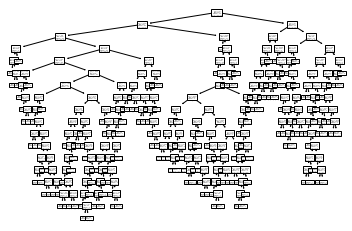

In [43]:
from sklearn import tree

tree.plot_tree(model)

## Interview Questions for Decision tree

1. How Decision tree works? Gini Impurity, Entropy 

2. What is the Effect of Outliers in tree? in terms of Variance and Bias.

3. Decision tree Prunning?

4. Which libraries to use for making decision tree?

5. Difference of working of DecisionTreeClassifier and DecisionTreeRegessor